# 0. Import libraries, other preliminaries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# Problem 1: recreate the plot below with python

In [2]:
marriage_data = pd.read_excel('marriage_data.xlsx')

In [3]:
labels = list(marriage_data.index)

In [4]:
labels[1] = 'Less than\nhigh\nschool'
labels[2] = 'High\nschool\ngraduate'
labels[3] = 'Some\ncollege'
labels[4] = "Bachelor's\ndegree or\nmore"

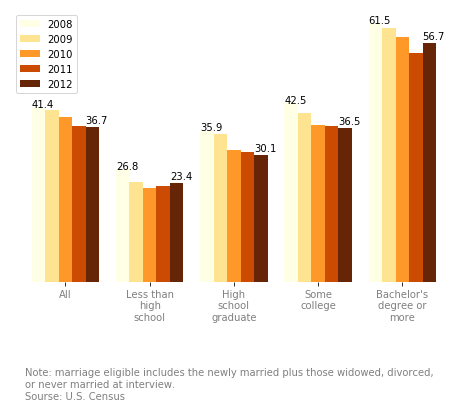

In [5]:
ax = marriage_data.plot.bar(cmap="YlOrBr", width=0.8, figsize=(8, 5))
ax.set_xticklabels(labels)
ax.set_yticks([])

for spine in ax.spines.values():
    spine.set_visible(False)

i=0
for p in ax.patches:
    
    if i < 5:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
    if i >= 20:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()+1))
    i+=1
plt.xticks(rotation='horizontal', color='grey')
plt.figtext(0.15, -0.2, 'Note: marriage eligible includes the newly married plus those widowed, divorced,\nor never married at interview.\nSourse: U.S. Census', color='grey')
plt.show()

# Problem 2: recreate the plot below with python

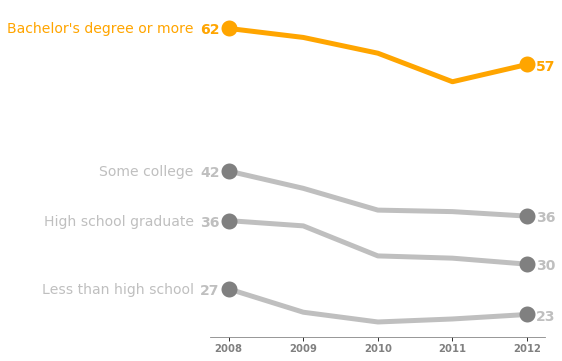

In [6]:
f, ax = plt.subplots(figsize=(6, 6))
columns = ['Less than high school', 'High school graduate', 'Some college', 'Bachelor\'s degree or more']
marriage_data.transpose()[columns].plot(ax=ax, legend=False)
    
ax.set_yticks([])
plt.xticks(color='grey', fontweight="bold")
xloc = plt.MaxNLocator(5)
ax.xaxis.set_major_locator(xloc)

xdata = ax.lines[0].get_xdata()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_edgecolor('grey')

ax.lines[0].set(linewidth=5, color='grey', alpha=0.5)
ax.lines[1].set(linewidth=5, color='grey', alpha=0.5)
ax.lines[2].set(linewidth=5, color='grey', alpha=0.5)
ax.lines[3].set(linewidth=5, color='orange', alpha=1)

for i, (line, column) in enumerate(zip(ax.lines, columns)):
    
    ydata = line.get_ydata()
    color = line.get_color()
    
    if i > 2:
        alpha = 1.0
    else:
        alpha = 0.5
    
    ax.scatter([xdata[0], xdata[-1]], [ydata[0], ydata[-1]], color=color, linewidth=10)
    ax.annotate(column, xy=(xdata[0], ydata[0]), xytext=(-35,-5), textcoords="offset points", \
                horizontalalignment='right', size=14, color=color, alpha=alpha)
    ax.annotate(str(int(np.round(ydata[0]))), xy=(xdata[0], ydata[0]), xytext=(-9,-6), textcoords="offset points", \
                horizontalalignment='right', size=14, color=color, fontweight='bold', alpha=alpha)
    ax.annotate(str(int(np.round(ydata[-1]))), xy=(xdata[-1], ydata[-1]), xytext=(9,-6), textcoords="offset points", \
            horizontalalignment='left', size=14, color=color, fontweight='bold', alpha=alpha)
        
plt.show()

# Problem 3: improve the plot below for product price data

In [7]:
price_data = pd.read_excel('product_price_data.xlsx')

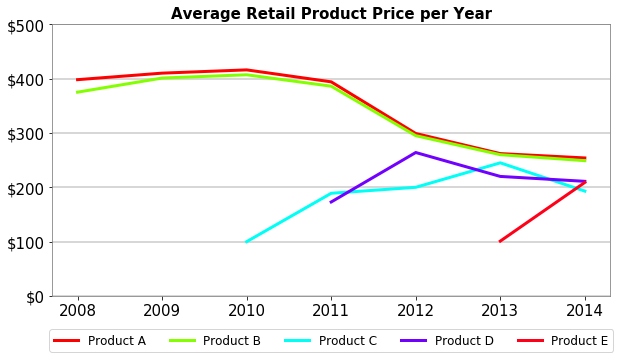

In [8]:
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

ax = price_data.plot(cmap="hsv", figsize=(10, 5), linewidth=3)
ax.yaxis.set_major_formatter(tick)
plt.grid(True, axis='y', linewidth=2, alpha=0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=False, ncol=5, prop={'size': 12})
ax.set_yticks(np.arange(0, 501, 100))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

for spine in ax.spines.values():
    spine.set_edgecolor('gray')

plt.title('Average Retail Product Price per Year',fontweight="bold", fontsize = 15)
plt.show()